#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 23 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


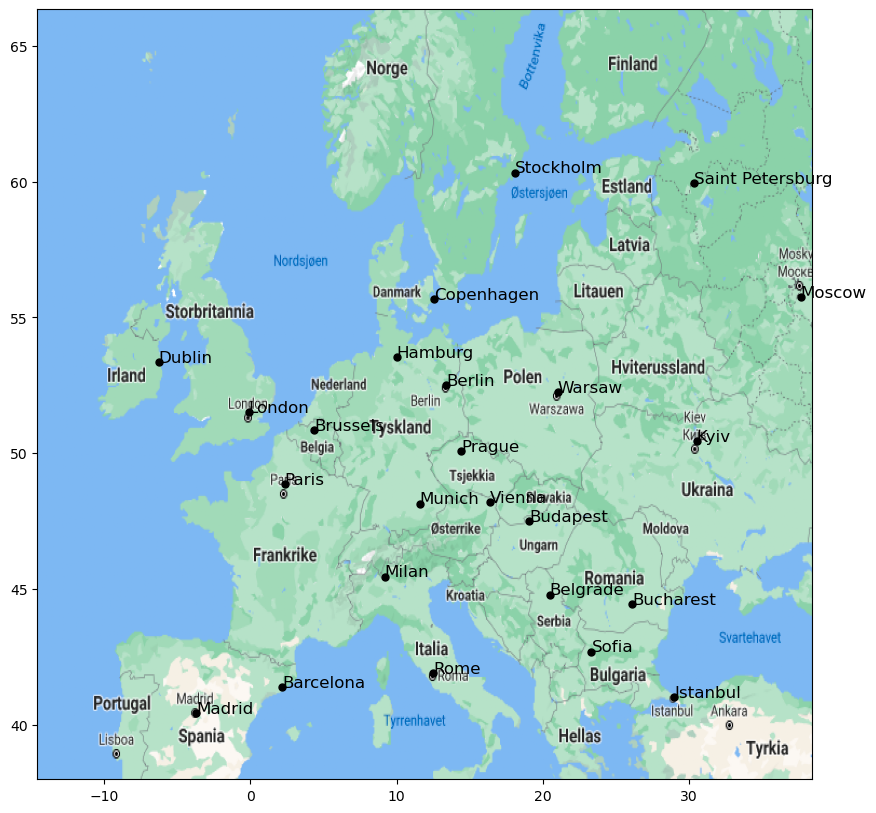

In [9]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [10]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


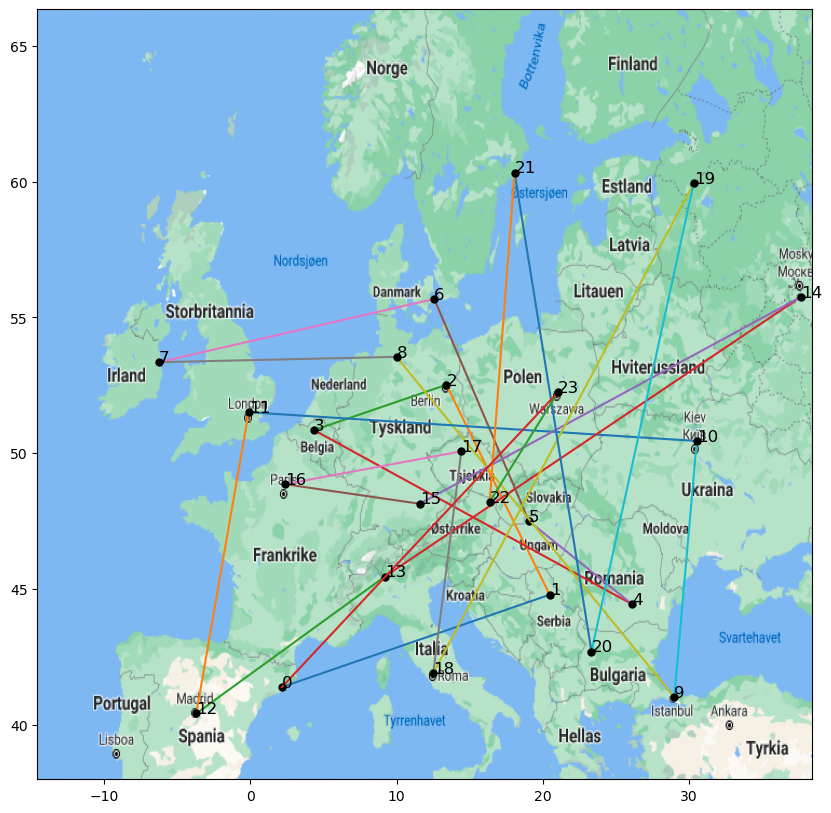

In [11]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

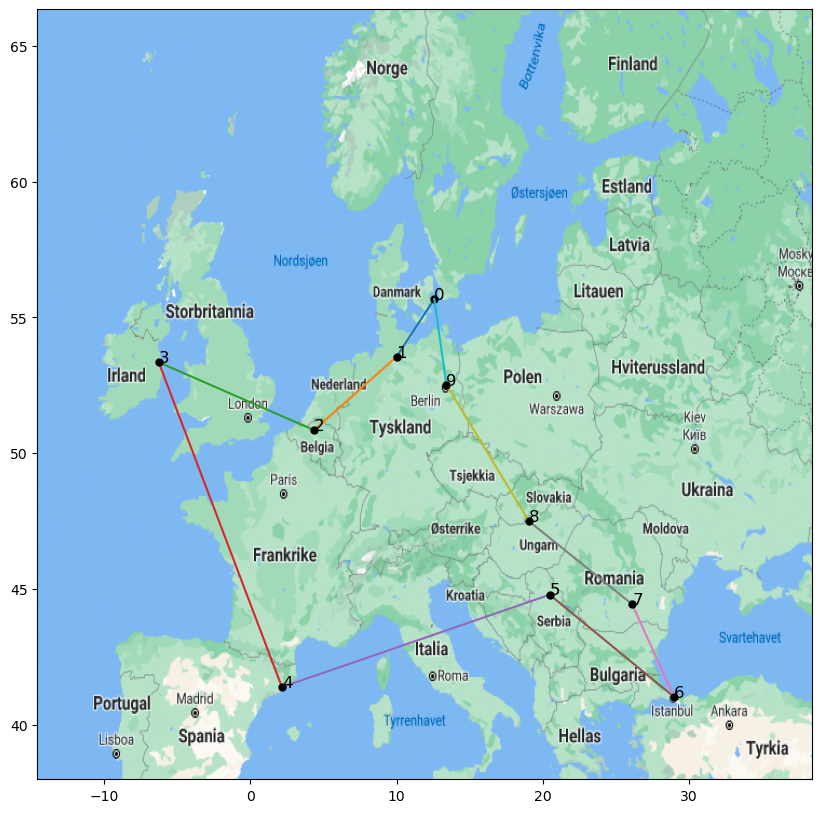

Shortest tour: ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
Minimum distance: 7486.309999999999 km
Time taken: 18.51 seconds


In [12]:
# Implement the algorithm here
import time
import itertools
import csv
import numpy as np
import matplotlib.pyplot as plt

# Load distances from the CSV file
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    distances = np.array([[float(i) for i in row[0:]] for row in data[1:]])

# Create a city-to-index map
city_to_index = {city: idx for idx, city in enumerate(cities)}

# Function to calculate the total distance of a tour
def calculate_distance(tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        current_city_idx = city_to_index[tour[i]]
        next_city_idx = city_to_index[tour[i + 1]]
        total_distance += distances[current_city_idx][next_city_idx]
    total_distance += distances[city_to_index[tour[-1]]][city_to_index[tour[0]]]  # Return to starting city
    return total_distance

# def plot plan (taken from above code)
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()

# Select a subset of cities for the exhaustive search (6-10 cities)
selected_cities = sorted(city_coords.keys())[:10]

# Measure time
start_time = time.time()

# Generate all permutations of the selected cities
all_permutations = itertools.permutations(selected_cities)

# Initialize variables to track the shortest tour
shortest_tour = None
min_distance = float('inf')

# Exhaustive search over all permutations
for permutation in all_permutations:
    dist = calculate_distance(permutation)
    if dist < min_distance:
        min_distance = dist
        shortest_tour = permutation

# Measure end time
end_time = time.time()
elapsed_time = end_time - start_time
        
# Visualize the shortest tour
plot_plan(shortest_tour)

print(f"Shortest tour: {shortest_tour}")
print(f"Minimum distance: {min_distance} km")
print(f"Time taken: {elapsed_time:.2f} seconds")

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [8]:
# Answer
# Shortest tour: ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
# Minimum distance: 7486.309999999999 km
# Time taken: 17.96 seconds
# The approximation of how long it would take to perform exhaustive search on all 24 cities would be a lot longer than 17 seconds
# because the algorithm has a run time complexity of O(n!), it would perform o(24!) calculations 
# divide that by o(10!) we well get an estimate of how manay times our 10 city algorithm has to run...
# ...to complete our O(24!) algorithm, 24! is a number with 24 digits so 17 * 10^24 we will be looking at years to finish our
# algorithm

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

10 Cities - Best: 7486.3099999999995, Worst: 8377.24, Mean: 7562.74, Std Dev: 200.73
24 Cities - Best: 13159.969999999998, Worst: 17295.5, Mean: 14837.81, Std Dev: 920.84
Plotting plan for 10 cities...


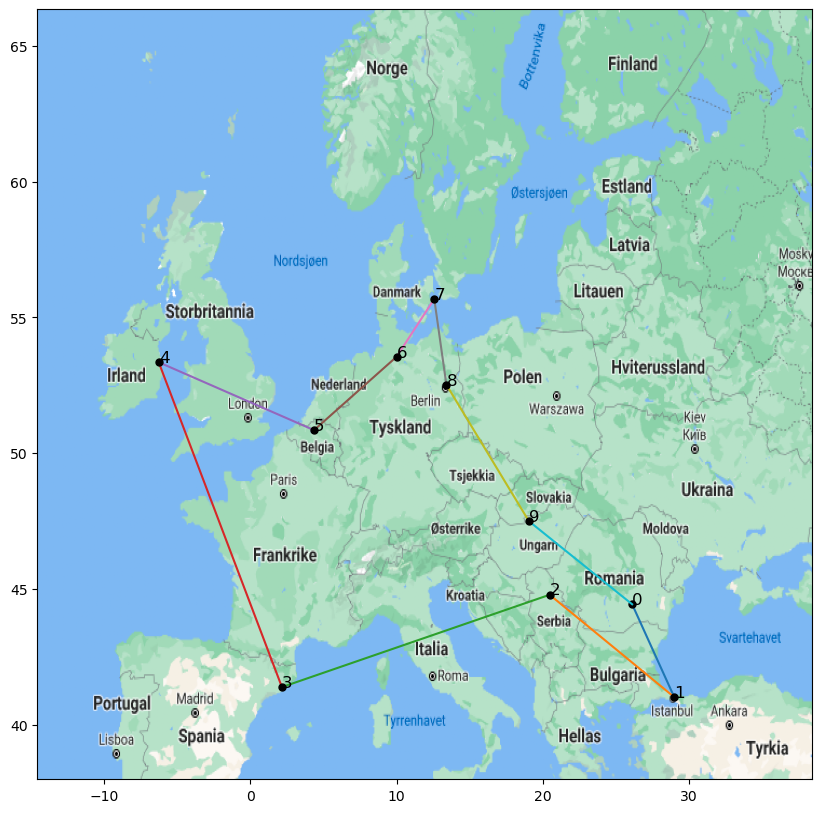

Plotting plan for 24 cities...


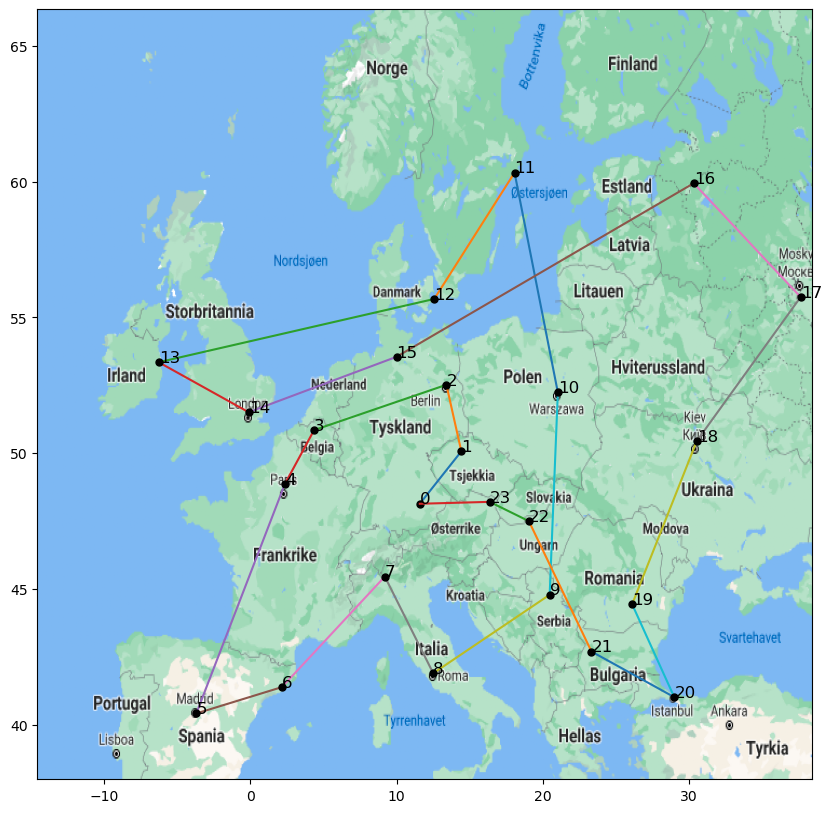

In [13]:
# Implement the algorithm here
import time
import numpy as np
import random
import itertools
import csv
import matplotlib.pyplot as plt

# Function to generate a random neighbor (swap two cities in the tour)
def get_random_neighbor(tour):
    new_tour = tour[:]
    i, j = random.sample(range(len(tour)), 2)
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

# Hill climbing algorithm
def hill_climb(cities, max_iterations=1000):
    current_tour = cities[:]
    random.shuffle(current_tour)
    current_distance = calculate_distance(current_tour)
    
    for _ in range(max_iterations):
        neighbor_tour = get_random_neighbor(current_tour)
        neighbor_distance = calculate_distance(neighbor_tour)
        
        # If the neighbor is better, accept it
        if neighbor_distance < current_distance:
            current_tour, current_distance = neighbor_tour, neighbor_distance
    
    return current_tour, current_distance

# Function to evaluate the hill climber over multiple runs
def evaluate_hill_climber(cities, num_runs=20, max_iterations=1000):
    results = []
    for _ in range(num_runs):
        _, distance = hill_climb(cities, max_iterations)
        results.append(distance)
    
    # Calculate statistics
    best = min(results)
    worst = max(results)
    mean = np.mean(results)
    std_dev = np.std(results)
    
    return best, worst, mean, std_dev, results

# Run the hill climber for the first 10 cities and all 24 cities
first_10_cities = sorted(city_coords.keys())[:10]
all_cities = sorted(city_coords.keys())

# Measure performance for 10 cities
best_10, worst_10, mean_10, std_dev_10, results_10 = evaluate_hill_climber(first_10_cities)
print(f"10 Cities - Best: {best_10}, Worst: {worst_10}, Mean: {mean_10:.2f}, Std Dev: {std_dev_10:.2f}")

# Measure performance for all 24 cities
best_24, worst_24, mean_24, std_dev_24, results_24 = evaluate_hill_climber(all_cities)
print(f"24 Cities - Best: {best_24}, Worst: {worst_24}, Mean: {mean_24:.2f}, Std Dev: {std_dev_24:.2f}")

# Plot plans
print("Plotting plan for 10 cities...")
best_tour_10, _ = hill_climb(first_10_cities)
plot_plan(best_tour_10)

print("Plotting plan for 24 cities...")
best_tour_24, _ = hill_climb(all_cities)
plot_plan(best_tour_24)


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

Population 50 - Best: 16316.92, Worst: 19960.98, Mean: 17841.60, Std Dev: 1107.85
Population 100 - Best: 15353.91, Worst: 17684.83, Mean: 16642.53, Std Dev: 629.40
Population 200 - Best: 13319.70, Worst: 16743.50, Mean: 15691.86, Std Dev: 810.69
Time taken: 152.16 seconds


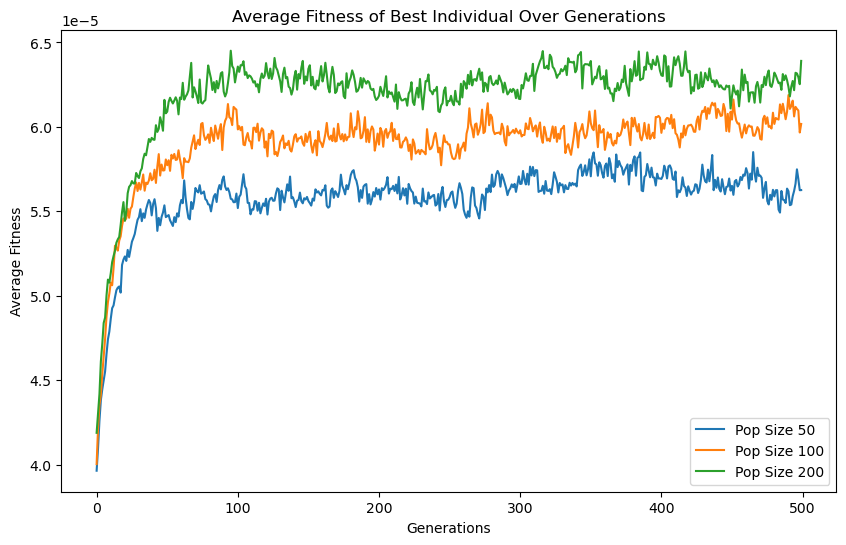

Plotting example tour for population size 50...


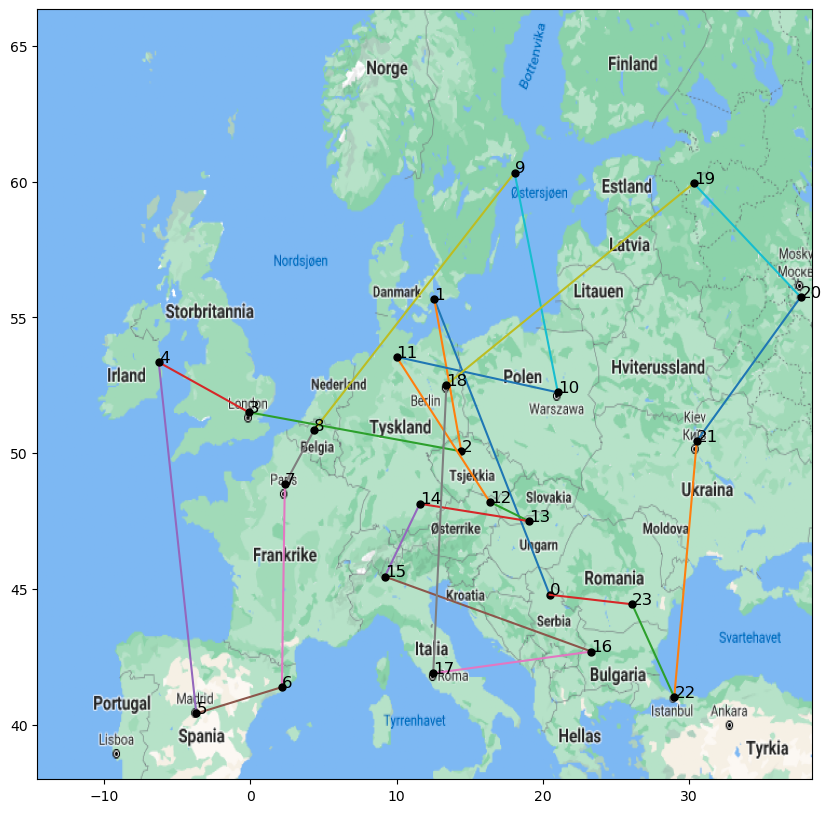

Plotting example tour for population size 100...


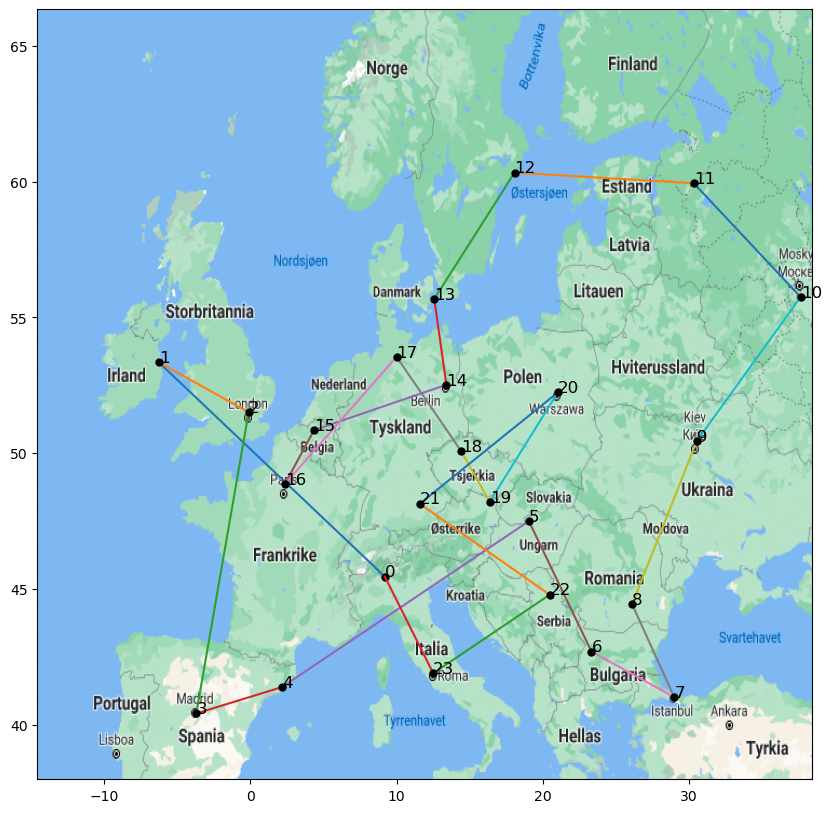

Plotting example tour for population size 200...


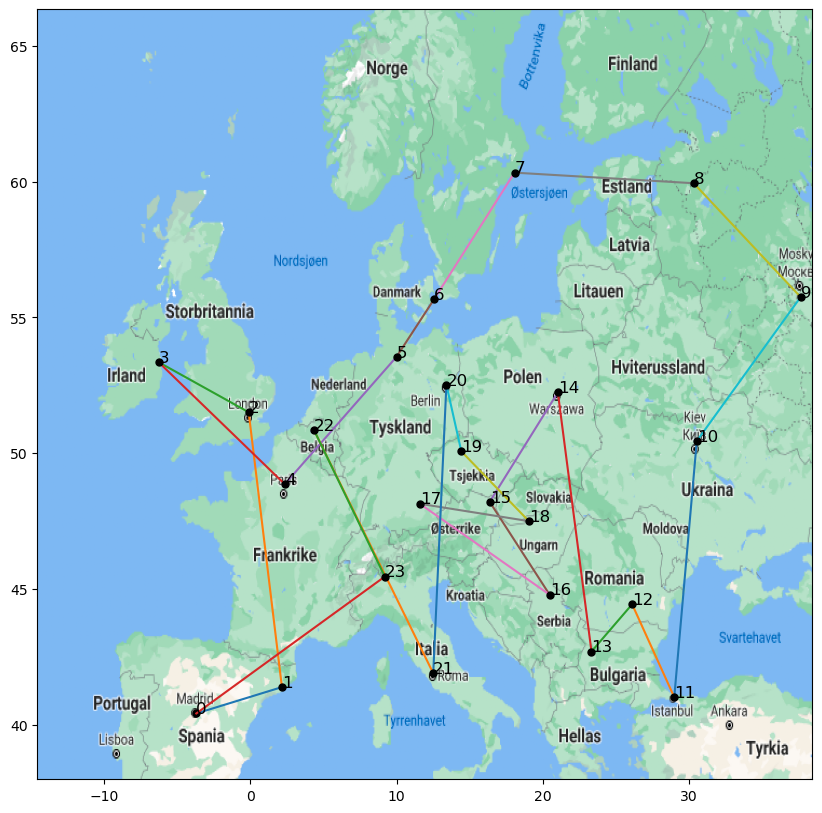

In [14]:
# Implement the algorithm here
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Fitness function: inverse of the tour distance
def fitness(tour):
    return 1 / calculate_distance(tour)

# Tournament selection
def tournament_selection(population, fitnesses, k=3):
    selected = random.choices(list(zip(population, fitnesses)), k=k)
    return max(selected, key=lambda x: x[1])[0]

# Order Crossover (OX)
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end] = parent1[start:end]
    idx = end
    for city in parent2:
        if city not in child:
            while child[idx % size] != -1:
                idx += 1
            child[idx % size] = city
    return child

# Swap mutation
def mutate(tour, mutation_rate=0.1):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

# Genetic Algorithm
def genetic_algorithm(cities, pop_size=50, generations=500, mutation_rate=0.1):
    # Initialize population
    population = [random.sample(cities, len(cities)) for _ in range(pop_size)]
    fitnesses = [fitness(individual) for individual in population]
    best_fitness_over_time = []

    for _ in range(generations):
        # Select parents and create new population
        new_population = []
        for _ in range(pop_size):
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            child = order_crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        # Update population and fitnesses
        population = new_population
        fitnesses = [fitness(individual) for individual in population]

        # Track the best fitness of this generation
        best_fitness_over_time.append(max(fitnesses))

    # Return the best tour and fitness history
    best_tour = population[np.argmax(fitnesses)]
    return best_tour, 1 / max(fitnesses), best_fitness_over_time

# Run GA with multiple population sizes and evaluate
def evaluate_genetic_algorithm(cities, pop_sizes=[50, 100, 200], generations=500, num_runs=20):
    results = {}
    for pop_size in pop_sizes:
        all_best_tours = []
        all_fitness_histories = []
        for _ in range(num_runs):
            best_tour, best_length, fitness_history = genetic_algorithm(
                cities, pop_size=pop_size, generations=generations
            )
            all_best_tours.append(best_length)
            all_fitness_histories.append(fitness_history)

        # Calculate statistics
        best = min(all_best_tours)
        worst = max(all_best_tours)
        mean = np.mean(all_best_tours)
        std_dev = np.std(all_best_tours)

        # Store results
        results[pop_size] = {
            "best": best,
            "worst": worst,
            "mean": mean,
            "std_dev": std_dev,
            "fitness_history": np.mean(all_fitness_histories, axis=0),  # Average over runs
            "example_tour": genetic_algorithm(cities, pop_size=pop_size, generations=generations)[0]
        }

        print(f"Population {pop_size} - Best: {best:.2f}, Worst: {worst:.2f}, Mean: {mean:.2f}, Std Dev: {std_dev:.2f}")

    return results

# Plot fitness curves for different population sizes
def plot_fitness_curves(results, generations):
    plt.figure(figsize=(10, 6))
    for pop_size, data in results.items():
        plt.plot(range(generations), data["fitness_history"], label=f"Pop Size {pop_size}")
    plt.title("Average Fitness of Best Individual Over Generations")
    plt.xlabel("Generations")
    plt.ylabel("Average Fitness")
    plt.legend()
    plt.show()

# Plot tours for different population sizes
def plot_tours(results):
    for pop_size, data in results.items():
        print(f"Plotting example tour for population size {pop_size}...")
        plot_plan(data["example_tour"])

# Measure time
start_time = time.time()
        
# Run the GA for the first n cities
first_10_cities = sorted(city_coords.keys())[:24] # :24 changes the amount of cities 
results_10 = evaluate_genetic_algorithm(first_10_cities, pop_sizes=[50, 100, 200], generations=500)

# Measure end time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

# Plot fitness curves for the first 10 cities
plot_fitness_curves(results_10, generations=500)

# Plot example tours for the first 10 cities
plot_tours(results_10)

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer
# The GA did find the same shortest tour as the exhaustive search it was 7486
# 2:
# the time it took for GA is 100 seconds if tested with population 50,100 and 200
# however a population of 50 achieved the global maxima, running only it results in 11 seconds, compared to 17 seconds with exhaustive search
# the running time of 24 cities GA performed with 152 seconds, the estimate of exhaustive search would be much slower
# 3:
# an estimate would be the population times the number of generations which is 50 * (500 + 1) would be 25,050 tours,
# meanwhile exhaustive search performs O(10!) searches, so the genetic algorithm looks at less tours but 
# still found the same best solution as exhaustive search.

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

Lamarckian - Best: 7486.31, Worst: 7486.31, Mean: 7486.31, Std Dev: 0.00
Baldwinian - Best: 8009.86, Worst: 10702.35, Mean: 9509.05, Std Dev: 696.98


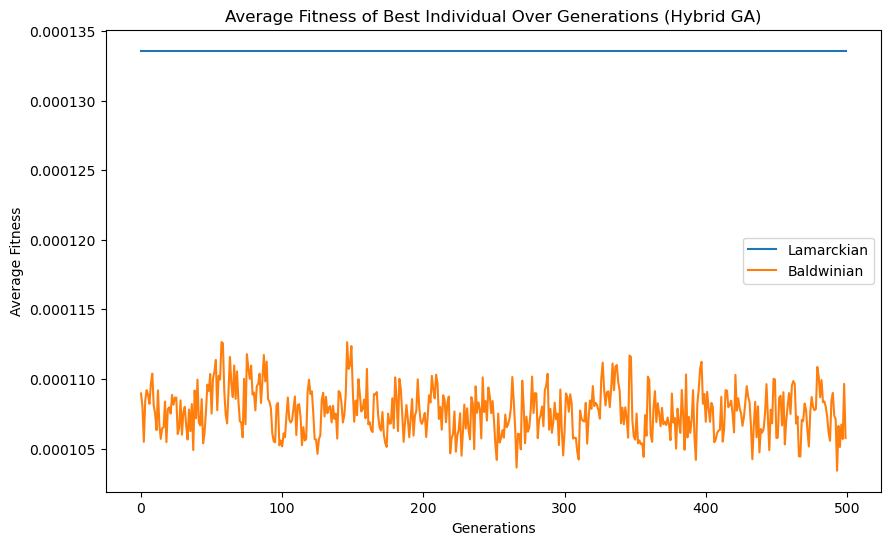

Plotting example tour for Lamarckian model...


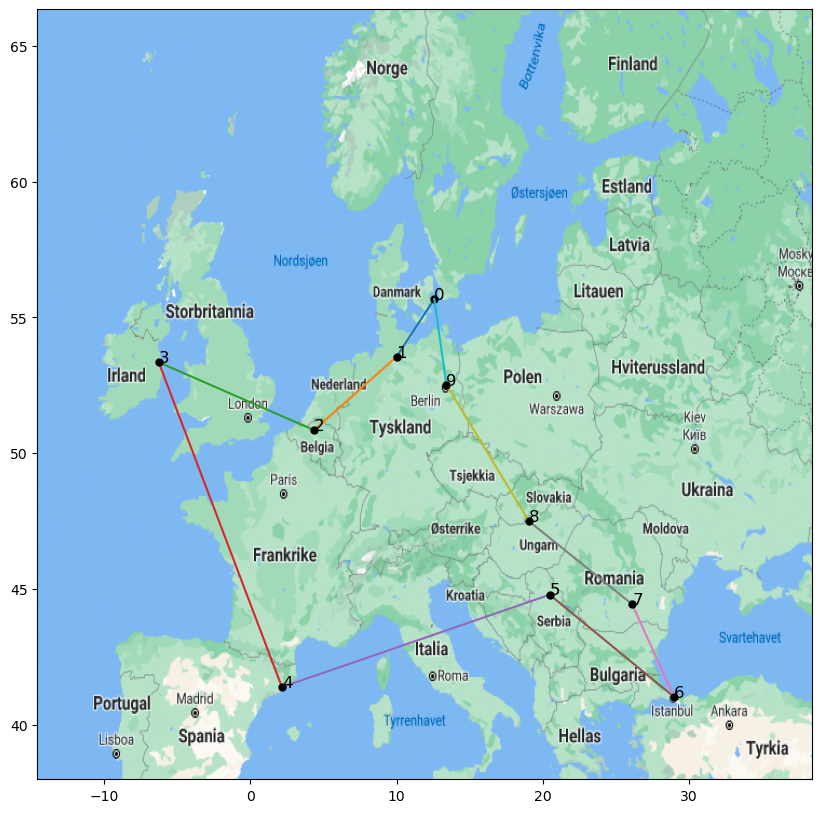

Plotting example tour for Baldwinian model...


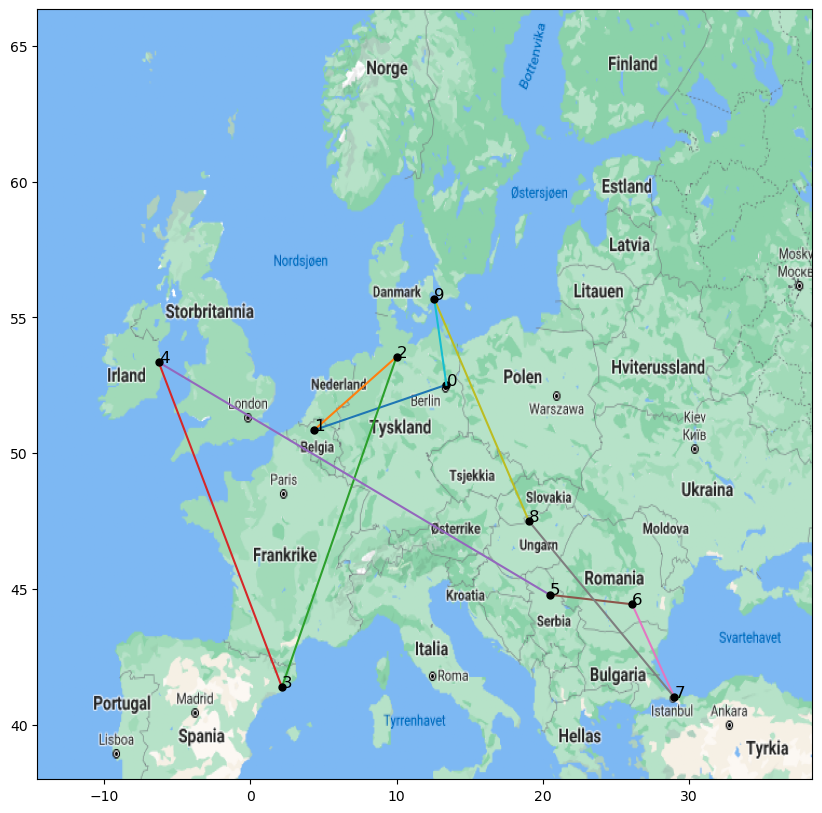

In [15]:
# Implement algorithm here
import random

# Hill Climber Function for TSP
def hill_climber(tour, iterations=100):
    current_tour = tour[:]
    current_distance = calculate_distance(current_tour)
    for _ in range(iterations):
        # Generate a neighbor by swapping two cities
        i, j = random.sample(range(len(tour)), 2)
        neighbor_tour = current_tour[:]
        neighbor_tour[i], neighbor_tour[j] = neighbor_tour[j], neighbor_tour[i]
        neighbor_distance = calculate_distance(neighbor_tour)
        # Accept the neighbor if it improves the distance
        if neighbor_distance < current_distance:
            current_tour = neighbor_tour
            current_distance = neighbor_distance
    return current_tour, current_distance

# Hybrid Genetic Algorithm with Hill Climbing
def hybrid_genetic_algorithm(
    cities, pop_size=50, generations=500, mutation_rate=0.1, hill_climb_iters=100, model="lamarckian"
):
    # Initialize population
    population = [random.sample(cities, len(cities)) for _ in range(pop_size)]
    fitnesses = [fitness(individual) for individual in population]
    best_fitness_over_time = []

    for _ in range(generations):
        # Apply hill climbing to each individual
        if model == "lamarckian":
            # Replace the individual with the result of the hill climber
            population = [hill_climber(individual, hill_climb_iters)[0] for individual in population]
            fitnesses = [fitness(individual) for individual in population]
        elif model == "baldwinian":
            # Keep the original individual, but assign its fitness based on hill climber result
            fitnesses = [1 / hill_climber(individual, hill_climb_iters)[1] for individual in population]

        # Create a new population
        new_population = []
        for _ in range(pop_size):
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            child = order_crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        # Update population and fitnesses
        population = new_population
        fitnesses = [fitness(individual) for individual in population]
        best_fitness_over_time.append(max(fitnesses))

    # Return the best tour and fitness history
    best_tour = population[np.argmax(fitnesses)]
    return best_tour, 1 / max(fitnesses), best_fitness_over_time

# Evaluate Hybrid GA for Both Models
def evaluate_hybrid_ga(
    cities, pop_size=50, generations=500, hill_climb_iters=100, num_runs=20
):
    results = {"lamarckian": {}, "baldwinian": {}}
    for model in ["lamarckian", "baldwinian"]:
        all_best_tours = []
        all_fitness_histories = []
        for _ in range(num_runs):
            best_tour, best_length, fitness_history = hybrid_genetic_algorithm(
                cities,
                pop_size=pop_size,
                generations=generations,
                hill_climb_iters=hill_climb_iters,
                model=model,
            )
            all_best_tours.append(best_length)
            all_fitness_histories.append(fitness_history)

        # Calculate statistics
        best = min(all_best_tours)
        worst = max(all_best_tours)
        mean = np.mean(all_best_tours)
        std_dev = np.std(all_best_tours)

        # Store results
        results[model] = {
            "best": best,
            "worst": worst,
            "mean": mean,
            "std_dev": std_dev,
            "fitness_history": np.mean(all_fitness_histories, axis=0),  # Average over runs
            "example_tour": hybrid_genetic_algorithm(
                cities,
                pop_size=pop_size,
                generations=generations,
                hill_climb_iters=hill_climb_iters,
                model=model,
            )[0],
        }

        print(
            f"{model.capitalize()} - Best: {best:.2f}, Worst: {worst:.2f}, Mean: {mean:.2f}, Std Dev: {std_dev:.2f}"
        )

    return results

# Plot fitness curves for both models
def plot_hybrid_fitness_curves(results, generations):
    plt.figure(figsize=(10, 6))
    for model, data in results.items():
        plt.plot(range(generations), data["fitness_history"], label=model.capitalize())
    plt.title("Average Fitness of Best Individual Over Generations (Hybrid GA)")
    plt.xlabel("Generations")
    plt.ylabel("Average Fitness")
    plt.legend()
    plt.show()

# Plot example tours for both models
def plot_hybrid_tours(results):
    for model, data in results.items():
        print(f"Plotting example tour for {model.capitalize()} model...")
        plot_plan(data["example_tour"])

# Run Hybrid GA for the first 10 cities
first_10_cities = sorted(city_coords.keys())[:10]
results_hybrid_10 = evaluate_hybrid_ga(first_10_cities, pop_size=50, generations=500)

# Plot fitness curves for the first 10 cities
plot_hybrid_fitness_curves(results_hybrid_10, generations=500)

# Plot example tours for the first 10 cities
plot_hybrid_tours(results_hybrid_10)

In [ ]:
# END explanation

# Name: Nikita USERNAME: nikitafe
# HOW TO RUN:
# please run the cells in jupyter one by one starting from the top to bottom
# the last model/algorithm (cell) takes the most time, approx over: 200 seconds

# Implemented with assistance of ChatGPT, but I made sure to fully understand the code that I am using,
# I have made an explanation to my code and choices in each cell below, but firstly I'll answer the last question

# How do the results compare to that of the pure GA, considering 
# the number of evaluations done?
# Noticably in my run of the Lamarckian algorithm it found the best fitness score rather instantenious
# and by the whole point of this algorithm it keeps this fittness score in it's next generations,
# this explains it's standard deviation of 0 because every run produced the same result

# The baldwinian approach has a much higher standard deviation and therefore shows variability in the results
# (mainly also because parents only save it's potential fitness score to future children unlike in lamarckian)
# I would assume baldwinian could be more usefull in searching true graphs where there's a lot of local maxima
# to then break out and find the global, meanwhile lamarckian algorithm is more focused on keeping the best possible found
# solution
# In the terms from the lecture one is more exploitative while other is more focused on exploration

# first algorithm exhaustive search
# this is the **brute force** solution trying every single possible combination of tours,
# then making sure to save the minimum distance in memory
# this is makes it reliable to give the correct answer, 
# but it's highly inneffective when scaled upwards with more possible solutions
# it having an O(n!) should be suffient to comment on it's *inscability*

# second cell, Hill Climbing
# this algorithm is more effective in searching, starting at a random point (in this case a random tour)
# it tries to look for the best possible step to move towards the maximum (in this case lower the distance)
# this is more effective in terms of scability and it will in it's name "hill climb" towards a maximum
# problem is that it can potentially reach a local maximum instead of a global maxima, this means that the selected route
# in our case cannot be optimized further, but there might exists other routes (that started differently) that are better

# genetic algorithm
# this is where I think the term Evolutionary algorithms really start to set in
# in this codeblock, it generates a population of random solutions, the random diversity of the population means
# that chance of finding global maximum increases
# It then uses selection, crossover and mutation to iteratively evolve the population
# Selection, in this algorithm I use a tournament solution where the parent is chosen
# among the best of randomly selected 3 solutions and that repeats for each individual
# then the child gets a crossover between 2 of the selected parents
# then there's also a chance of mutation, all of this to potentially escape a local maximum
# by increasing our population we also have a higher chance to find the optimal solution
# the fitness function is a float between 0.00... and 1 where the higher numer the lower is the distance in KM
# for example tour A = 100 km and tour b = 200 km our function will have 1/100 = 0.01 and 1/200 = 0.005
# 100 is less to the fitness funtion will output it as a higher number, it's important to clearly define the fitness or
# we could potentially reach the wrong maximum

# Hybrid algorithm
# Now this algorithm uses the hill climb algorithm along with the evolutionary algorithm concept
# the hill climb works (just like before) works by swapping two cities in the tour
# now the hybrid algorithm makes a population and uses hill clambing to improve it based on either Lamarckian or baldwinian
# lamarckian: replaces each individual in the population with the hill climb
# baldwinian: updates only the fitness values based on the hill-climbing results but keeps original tours
# then it does it's crossover and mutation function and evaluates it's distance
